In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import (user, password, host, port, database)


In [2]:
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = engine.connect()

In [3]:
department_data = pd.read_sql("SELECT * FROM departments", conn)
dept_emp_data = pd.read_sql("SELECT * FROM dept_emp", conn)
dept_manager_data = pd.read_sql("SELECT * FROM dept_manager", conn)
employee_data = pd.read_sql("SELECT * FROM employees", conn)
salary_data = pd.read_sql("SELECT * FROM salaries", conn)
titles_data = pd.read_sql("SELECT * FROM titles", conn)

salary_data

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [4]:
salary_data.loc[salary_data['salary'] > 125000]

,emp_no,salary
27557,37558,125469
34187,44188,127238
105024,205000,129492
244780,444756,127041
258326,458302,126703


In [5]:
bins = [0, 9999, 19999, 29999, 39999, 49999, 59999, 69999, 79999, 89999, 99999, 109999, 119999, 129999]

salary_labels = ["0 to 9,999", "10,000 to 19,999", "20,000 to 29,999", "30,000 to 39,999", "40,000 to 49,999", 
                 "50,000 to 59,999", "60,000 to 69,999", "70,000 to 79,999", "80,000 to 89,999", "90,000 to 99,999",
                "100,000 to 109,999", "110,000 to 119,999", "120,000 to 129,999"]

In [6]:
salary_data["Salary Range"] = pd.cut(salary_data["salary"], bins, labels = salary_labels)
salary_data

,emp_no,salary,Salary Range
0,10001,60117,"60,000 to 69,999"
1,10002,65828,"60,000 to 69,999"
2,10003,40006,"40,000 to 49,999"
3,10004,40054,"40,000 to 49,999"
4,10005,78228,"70,000 to 79,999"
...,...,...,...
300019,499995,40000,"40,000 to 49,999"
300020,499996,58058,"50,000 to 59,999"
300021,499997,49597,"40,000 to 49,999"
300022,499998,40000,"40,000 to 49,999"


In [7]:
count_data = salary_data.groupby("Salary Range")
count = count_data.count()
clean_count = count['salary']
clean_count

Salary Range
0 to 9,999                 0
10,000 to 19,999           0
20,000 to 29,999           0
30,000 to 39,999           0
40,000 to 49,999      158465
50,000 to 59,999       57915
60,000 to 69,999       41413
70,000 to 79,999       24814
80,000 to 89,999       11845
90,000 to 99,999        4284
100,000 to 109,999      1069
110,000 to 119,999       195
120,000 to 129,999        24
Name: salary, dtype: int64

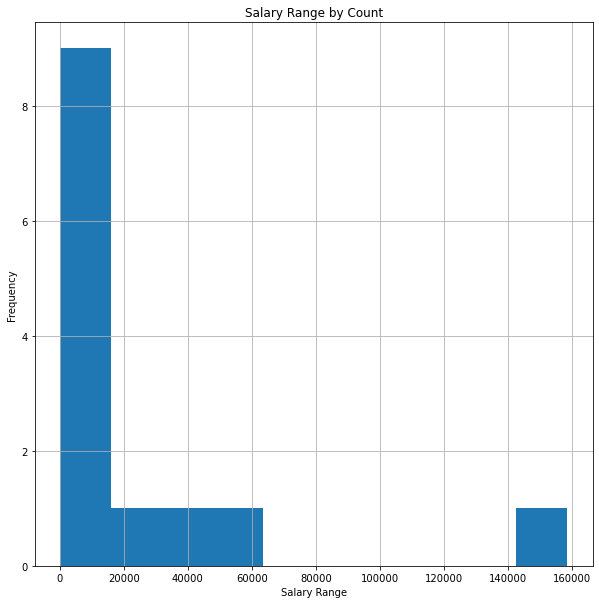

In [12]:
salary_graph = clean_count.plot(kind='hist', figsize=(10,10))
plt.title("Salary Range by Count")
plt.xlabel("Salary Range")

plt.grid()
plt.show()